<a href="https://colab.research.google.com/github/VieiraEduardo/RandomForest_Uber/blob/main/ClassificacaoRandomForestUber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pipeline de Ciência de Dados ##

É importante definir todas as fases de criação de criação de um projeto que envolve Ciências de Dados, para detectar o problema de negócio e o objetivo desejado de forma eficiente.

1.Problema de Negócio

Prever o cancelamento das viagens que é a classificação de status da reserva.

2.Coleta e armasentamento de dados

Dados adquiridos do Kaggle

3.Pré Processamento e limpeza dos dados

4.Analise Exploratória dos Dados

5.Modelagem

6.Avaliação de Modelo

7.Interpretação e comunicação dos resultados

In [ ]:
# Bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder


In [ ]:
!pip install ydata-profiling

In [ ]:
# Carregar e ler dataset
df = pd.read_csv('/content/ncr_ride_bookings.csv', index_col='Customer ID')


In [ ]:
# Verificar informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, "CID1982111" to "CID4108667"
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Vehicle Type                       150000 non-null  object 
 5   Pickup Location                    150000 non-null  object 
 6   Drop Location                      150000 non-null  object 
 7   Avg VTAT                           139500 non-null  float64
 8   Avg CTAT                           102000 non-null  float64
 9   Cancelled Rides by Customer        10500 non-null   float64
 10  Reason for cancelling by Customer  10500 non-null   object 
 11  Cancelled Rides by Driver  

## 3. Pré Processamento e Limpeza dos dados

In [ ]:
# 2. Assegurar que as colunas 'Date' e 'Time' são do tipo string para evitar erros.
df['Date'] = df['Date'].astype(str)
df['Time'] = df['Time'].astype(str)

# 3. Combinar as colunas 'Date' e 'Time' em uma única coluna 'DateTime'.
df['DateTime'] = df['Date'] + ' ' + df['Time']

# 4. Converter a nova coluna 'DateTime' para o tipo datetime.
df['DateTime'] = pd.to_datetime(df['DateTime'])

# 5. (Opcional) Criar novas colunas para análise, como o dia da semana.
df['DayOfWeek'] = df['DateTime'].dt.day_name()
df['Hour'] = df['DateTime'].dt.hour

#Excluir coluna Date e coluna Time
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [ ]:
df.shape

(150000, 21)

In [ ]:
# Alinhar cabeçalho do df
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')



In [ ]:
# Remover primeira linha não mais necessária
df.drop(df.index[0], inplace=True)

In [ ]:
# Verificar linhas do dataset de forma aleatoria
df.sample(1)


booking_id booking_status vehicle_type pickup_location  \
Customer ID                                                              
"CID5406572"  "CNR9843957"      Completed     Go Sedan       Aya Nagar   

             drop_location  avg_vtat  avg_ctat  cancelled_rides_by_customer  \
Customer ID                                                                   
"CID5406572"     Ghaziabad      12.4      27.2                          NaN   

             reason_for_cancelling_by_customer  cancelled_rides_by_driver  \
Customer ID                                                                 
"CID5406572"                               NaN                        NaN   

              ... incomplete_rides  incomplete_rides_reason booking_value  \
Customer ID   ...                                                           
"CID5406572"  ...              NaN                      NaN         193.0   

              ride_distance  driver_ratings  customer_rating  payment_method  \
Customer ID                                                                    
"CID5406572"          49.73             3.2              4.9             UPI   

                        datetime dayofweek hour  
Customer ID                                      
"CID5406572" 2024-02-05 10:54:51    Monday   10  

[1 rows x 21 columns]

In [ ]:
# verificar as colunas que contem dados nulos
df.isnull().sum()

booking_id                                0
booking_status                            0
vehicle_type                              0
pickup_location                           0
drop_location                             0
avg_vtat                              10499
avg_ctat                              47999
cancelled_rides_by_customer          139499
reason_for_cancelling_by_customer    139499
cancelled_rides_by_driver            122999
driver_cancellation_reason           122999
incomplete_rides                     140999
incomplete_rides_reason              140999
booking_value                         47999
ride_distance                         47999
driver_ratings                        56999
customer_rating                       56999
payment_method                        47999
datetime                                  0
dayofweek                                 0
hour                                      0
dtype: int64

##Observação

É perceptivel que mais da metade das colunas tem valores nulos/sem informação, isso para um modelo preditivo pode enviesar o modelo se não bem tratado. É necessário entender se aqueles valores realmente tem ou não informação úteis, ou se não foram devidadamente preenchidos na hora da aquisição do Banco de Dados.
Para melhor visualização e compreensão, colocar os valores null em porcetagem que dá um noção melhor se dá para trabalhar com determinada coluna.


In [ ]:
# Verificar quantos por % de dados nulos tem em cada coluna do Dataframe
(df.isnull().sum()/df.shape[0])*100

booking_id                            0.000000
booking_status                        0.000000
vehicle_type                          0.000000
pickup_location                       0.000000
drop_location                         0.000000
avg_vtat                              6.999380
avg_ctat                             31.999547
cancelled_rides_by_customer          92.999953
reason_for_cancelling_by_customer    92.999953
cancelled_rides_by_driver            81.999880
driver_cancellation_reason           81.999880
incomplete_rides                     93.999960
incomplete_rides_reason              93.999960
booking_value                        31.999547
ride_distance                        31.999547
driver_ratings                       37.999587
customer_rating                      37.999587
payment_method                       31.999547
datetime                              0.000000
dayofweek                             0.000000
hour                                  0.000000
dtype: float64

##Observação

Colunas com mais de 50% dos dados ausentes, após interpretação com o modelo de negócio, podem ser consideradas a se serem excluidas. Colunas com baixa porcentagem, seja até 10% ou 20% podemos realizar algumas tecnicas de imputação para tentar preencher esses valores ausentes.

As colunas Driver Ratings e Customer Rating haviam 38% de dados ausentes, onde optei por fazer uma imputação pela mediana que é uma estratégia robusta aos valores da coluna e não distorce a distribuição dos dados, preservando e retendo o máximo de informação.


In [ ]:
# substituir dados nan da coluna Driver Rating pela Mediana
df['driver_ratings'].fillna(df['driver_ratings'].median(), inplace=True)

In [ ]:
# substituir dados nan da coluna Customer Rating pela Mediana
df['customer_rating'].fillna(df['customer_rating'].median(), inplace=True)

## Oberservação

Existem 4 colunas com mais de 80% com dados nulos. Cancelled Rides by Customer e reason for cancelling by customer	(93%) e Reason for cancelled rides by driver  e Driver Cancellation Reason (82%).

Ideal fazer uma imputação de dados onde optei pela seguinte estratégia:

##Para Cancelled Rides by Customer e Cancelled Rides by Driver:

Substituir os valores nulos por 0.

Onde já existe o valor 1, eu os mantenho-o.

O resulto obtido será uma variável binária (0 ou 1) que indica se o cancelamento partiu do motorista ou do cliente. Isso é perfeito para um modelo de classificação.

##Para Reason for cancelling by Customer e Driver Cancellation Reason:

Substituir os valores nulos por uma categoria como "Não se Aplica" ou "Corrida Concluída".

Aos motivos de cancelamento existentes, como "Vehicle Breakdown". eu os mantenho-o.

O resultado obtido será uma variável categórica que informa o motivo do cancelamento, o que pode ser um recurso valioso para o modelo entender o comportamento de clientes e motoristas.

Ao fazer isso, eu não apenas preservo os dados, mas também crio variáveis poderosas com informação robusta que serão a base do modelo.

In [ ]:
# Substituir os valores nulos da coluna Cancelled Rides by Costumer e Cancelled Rides bu Driver
df['cancelled_rides_by_customer'].fillna(0, inplace=True)
df['cancelled_rides_by_driver'].fillna(0, inplace=True)

In [ ]:
# Substituir os valores nulos da coluna Cancelling by Customer e Driver Cancellation Reason por uma categoria Não se Aplica ou Corrida concluida
df['reason_for_cancelling_by_customer'].fillna(' Não Se Aplica', inplace=True)
df['driver_cancellation_reason'].fillna('Não Se Aplica', inplace=True)

In [ ]:
# Substituir dados das colunas avg_vtat, avg_ctat, booking value, Ride Distance pela mediana
df['avg_vtat'].fillna(df['avg_vtat'].median(), inplace=True)
df['avg_ctat'].fillna(df['avg_ctat'].median(), inplace=True)
df['booking_value'].fillna(df['booking_value'].median(), inplace=True)
df['ride_distance'].fillna(df['ride_distance'].median(), inplace=True)

In [ ]:
# Substituir os valores NAN da coluna imcomplete rides por 0
df['incomplete_rides'].fillna(0, inplace=True)

#Substituir os valores NAN da coluna Imcomplete rides reason por não se aplica
df['incomplete_rides_reason'].fillna('Não Se Aplica', inplace=True)

In [ ]:
# Substituir valores NAN da coluna Payment Method por Desconhecido
df['payment_method'].fillna('Desconhecido', inplace=True)

In [ ]:
df.isnull().sum()

booking_id                           0
booking_status                       0
vehicle_type                         0
pickup_location                      0
drop_location                        0
avg_vtat                             0
avg_ctat                             0
cancelled_rides_by_customer          0
reason_for_cancelling_by_customer    0
cancelled_rides_by_driver            0
driver_cancellation_reason           0
incomplete_rides                     0
incomplete_rides_reason              0
booking_value                        0
ride_distance                        0
driver_ratings                       0
customer_rating                      0
payment_method                       0
datetime                             0
dayofweek                            0
hour                                 0
dtype: int64

In [ ]:
# Traduzir o nome de todas as colunas
df.columns = df.columns.str.replace('booking_id', 'id_reserva')
df.columns = df.columns.str.replace('booking_status', 'status_reserva')
df.columns = df.columns.str.replace('vehicle_type', 'tipo_veiculo')
df.columns = df.columns.str.replace('pickup_location', 'local_embarque')
df.columns = df.columns.str.replace('drop_location', 'local_desembarque')
df.columns = df.columns.str.replace('avg_vtat', 'tempo_medio_viagem')
df.columns = df.columns.str.replace('avg_ctat', 'tempo_medio_cancelamento')
df.columns = df.columns.str.replace('cancelled_rides_by_customer', 'cancelamentos_cliente')
df.columns = df.columns.str.replace('reason_for_cancelling_by_customer', 'motivo_cancelamento_cliente')
df.columns = df.columns.str.replace('cancelled_rides_by_driver', 'cancelamentos_motorista')
df.columns = df.columns.str.replace('driver_cancellation_reason', 'motivo_cancelamento_motorista')
df.columns = df.columns.str.replace('incomplete_rides', 'viagens_incompletas')
df.columns = df.columns.str.replace('incomplete_rides_reason', 'motivo_viagens_incompletas')
df.columns = df.columns.str.replace('booking_value', 'valor_reserva')
df.columns = df.columns.str.replace('ride_distance', 'distancia_viagem')
df.columns = df.columns.str.replace('driver_ratings', 'avaliacao_motorista')
df.columns = df.columns.str.replace('customer_rating', 'avaliacao_cliente')
df.columns = df.columns.str.replace('payment_method', 'metodo_pagamento')
df.columns = df.columns.str.replace('datetime', 'data_hora')
df.columns = df.columns.str.replace('dayofweek', 'dia_semana')
df.columns = df.columns.str.replace('hour', 'hora')



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149999 entries, "CID4604802" to "CID4108667"
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   id_reserva                     149999 non-null  object        
 1   status_reserva                 149999 non-null  object        
 2   tipo_veiculo                   149999 non-null  object        
 3   local_embarque                 149999 non-null  object        
 4   local_desembarque              149999 non-null  object        
 5   tempo_medio_viagem             149999 non-null  float64       
 6   tempo_medio_cancelamento       149999 non-null  float64       
 7   cancelamentos_cliente          149999 non-null  float64       
 8   motivo_cancelamento_cliente    149999 non-null  object        
 9   cancelamentos_motorista        149999 non-null  float64       
 10  motivo_cancelamento_motorista  149999 non-null  object  

--- Distribuição Numérica do Booking Status ---
                       Contagem Percentual
status_reserva                            
Completed                 93000      62.0%
Cancelled by Driver       27000      18.0%
Cancelled by Customer     10500       7.0%
No Driver Found           10499       7.0%
Incomplete                 9000       6.0%


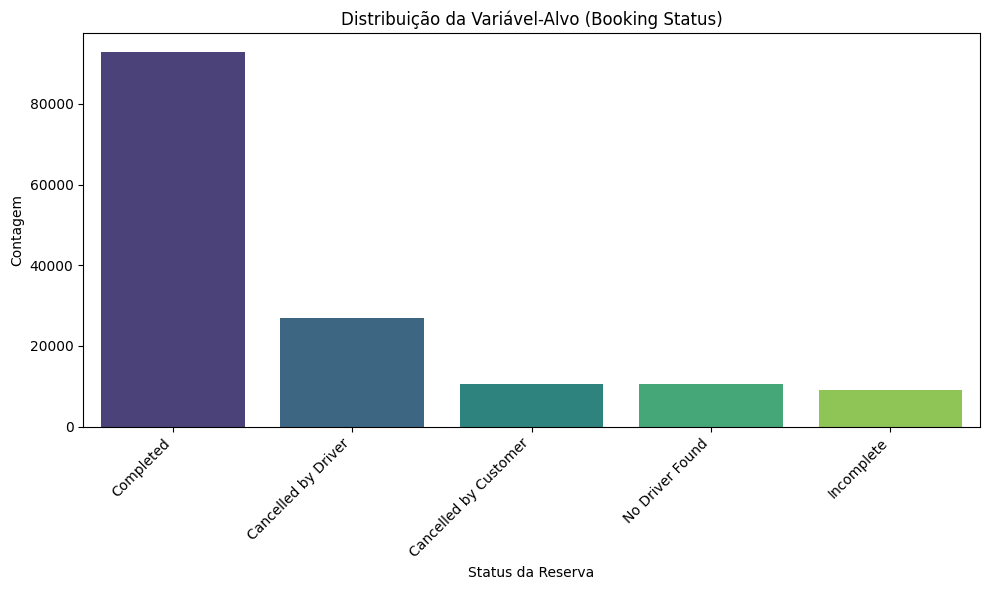

In [ ]:
# 1. Calcular a distribuição e o percentual da variável-alvo
status_counts = df['status_reserva'].value_counts()
status_percentages = df['status_reserva'].value_counts(normalize=True) * 100

print("--- Distribuição Numérica do Booking Status ---")
print(pd.DataFrame({'Contagem': status_counts, 'Percentual': status_percentages.round(2).astype(str) + '%'}))

# 3. Visualizar a distribuição (Gráfico de Barras)
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y=status_counts.values, palette="viridis")
plt.title('Distribuição da Variável-Alvo (Booking Status)')
plt.xlabel('Status da Reserva')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Verificar se há valores duplicados
df.duplicated().sum()

np.int64(0)

In [ ]:
# Ver as informações da motivo de cancelamento do motorista
df['motivo_cancelamento_motorista'].unique()



array(['Não Se Aplica', 'Personal & Car related issues',
       'Customer related issue', 'More than permitted people in there',
       'The customer was coughing/sick'], dtype=object)

## 4. Análise Exploratória dos Dados


In [ ]:
# Analisar a variável motivo cancelamento do motorista
df['motivo_cancelamento_motorista'].value_counts()

motivo_cancelamento_motorista
Não Se Aplica                          122999
Customer related issue                   6837
The customer was coughing/sick           6751
Personal & Car related issues            6726
More than permitted people in there      6686
Name: count, dtype: int64

In [ ]:
# Ver as informações da coluna motivo cancelamento do cliente
df['motivo_cancelamento_cliente'].unique()

array([' Não Se Aplica', 'Driver is not moving towards pickup location',
       'Driver asked to cancel', 'AC is not working', 'Change of plans',
       'Wrong Address'], dtype=object)

In [ ]:
# Verificar informações coluna viagens incompletas reason
df['viagens_incompletas_reason'].unique()

array(['Vehicle Breakdown', 'Não Se Aplica', 'Other Issue',
       'Customer Demand'], dtype=object)

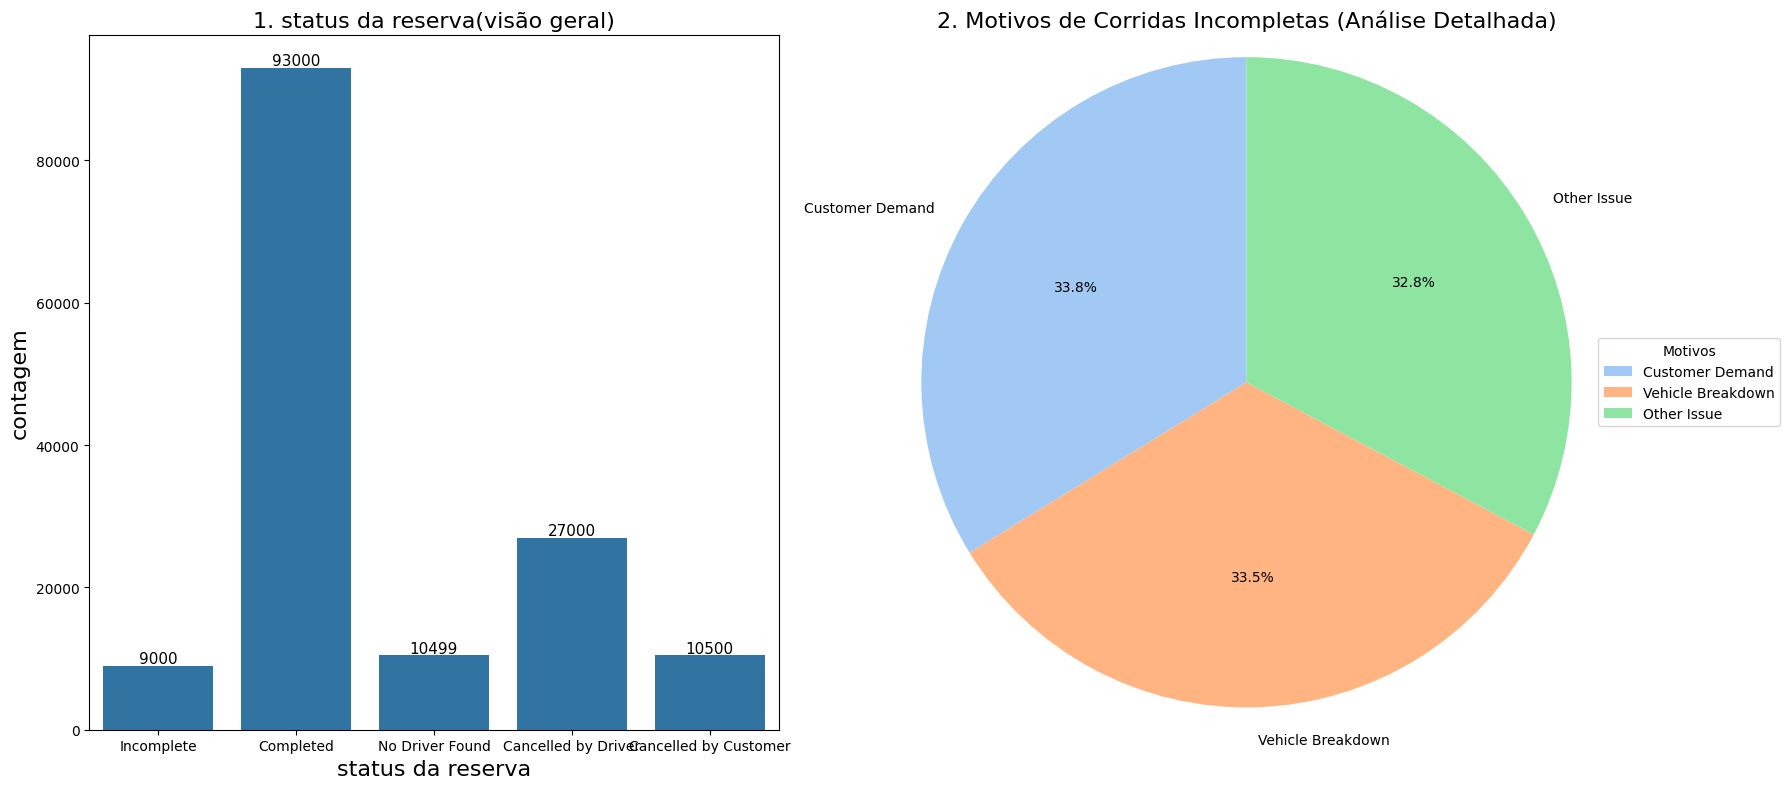

In [ ]:
# Criar gráfico lado a lado
fig, axes = plt.subplots(1,2, figsize=(18, 8))

# Distribuição geral dos do status da reserva
sns.countplot(ax=axes[0], x='status_reserva', data=df)
axes[0].set_title('1. status da reserva(visão geral)',fontsize=16)
axes[0].set_xlabel('status da reserva', fontsize=16)
axes[0].set_ylabel('contagem', fontsize=16)

# Adicionar rótulos de contagem em cada barra
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                     textcoords='offset points')

# Gráfico 2: Motivos das Corridas Incompletas
# Filtrar o DataFrame para incluir apenas corridas com status 'Incomplete'
df_incomplete = df[df['status_reserva'] == 'Incomplete']

# Obter a contagem dos motivos para o gráfico de pizza
motive_counts = df_incomplete['viagens_incompletas_reason'].value_counts()
labels = motive_counts.index
sizes = motive_counts.values

# Criar o gráfico de pizza
axes[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[1].set_title('2. Motivos de Corridas Incompletas (Análise Detalhada)', fontsize=16)
axes[1].axis('equal')  # Garante que o círculo seja perfeito
axes[1].legend(title="Motivos", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

##Insight

🚀A plataforma tem um problema de conclusão de corridas, e a causa principal é a falta de motoristas disponíveis ou falhas nos veículos. Esse insight é acionável, pois podemos direcionar as equipes de operações e tecnologia a focar em estratégias para atrair mais motoristas ou melhorar a manutenção da frota, em vez de investir em outras áreas.

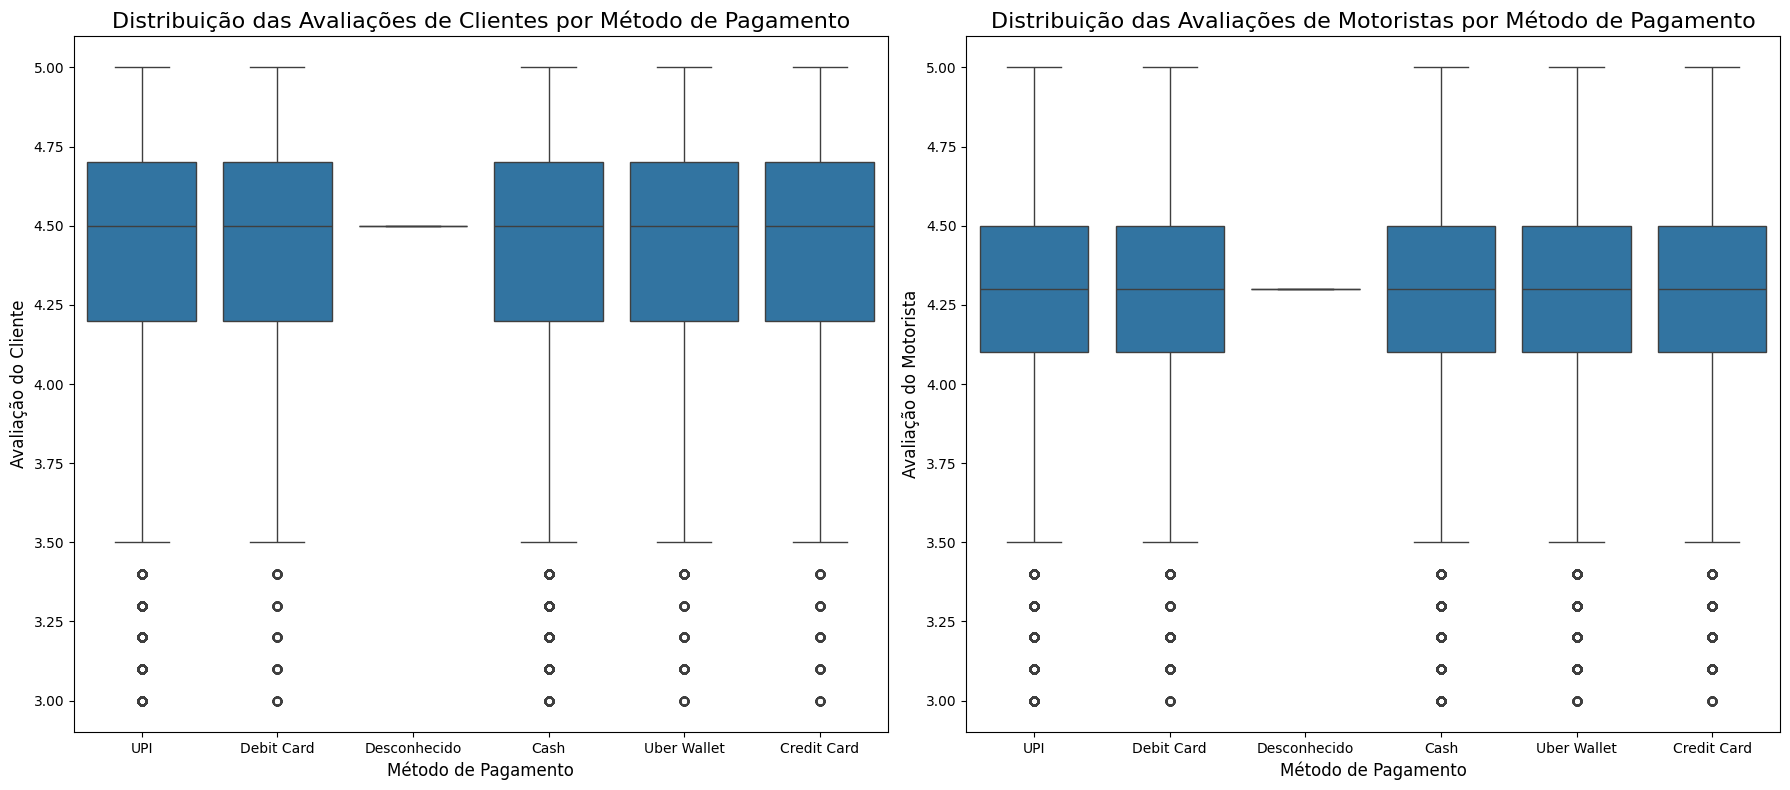

In [ ]:
# Criar os gráficos de box plot lado a lado para comparação
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Gráfico para a satisfação do cliente
sns.boxplot(ax=axes[0], data=df, x='metodo_pagamento', y='avaliacao_cliente')
axes[0].set_title('Distribuição das Avaliações de Clientes por Método de Pagamento', fontsize=16)
axes[0].set_xlabel('Método de Pagamento', fontsize=12)
axes[0].set_ylabel('Avaliação do Cliente', fontsize=12)

# Gráfico para a satisfação do motorista
sns.boxplot( ax=axes[1], data=df, x='metodo_pagamento', y='avaliacao_motorista')
axes[1].set_title('Distribuição das Avaliações de Motoristas por Método de Pagamento', fontsize=16)
axes[1].set_xlabel('Método de Pagamento', fontsize=12)
axes[1].set_ylabel('Avaliação do Motorista', fontsize=12)

plt.tight_layout()
plt.show()


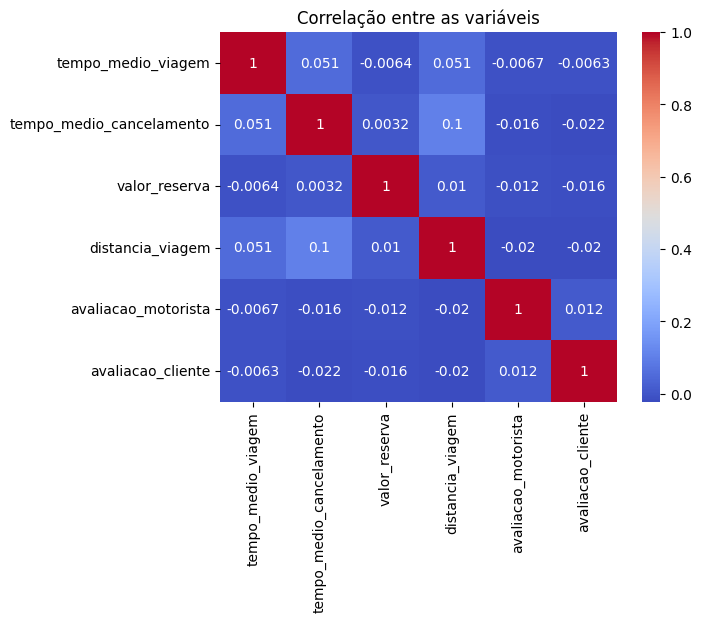

In [ ]:
# Criar varíável com as colunas númericas para criar gráfico de correlação
cols = ['tempo_medio_viagem','tempo_medio_cancelamento','valor_reserva','distancia_viagem','avaliacao_motorista','avaliacao_cliente']

#Criar gráfico de correlação
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm' )
plt.title('Correlação entre as variáveis')
plt.show()

Text(0, 0.5, 'Localização')

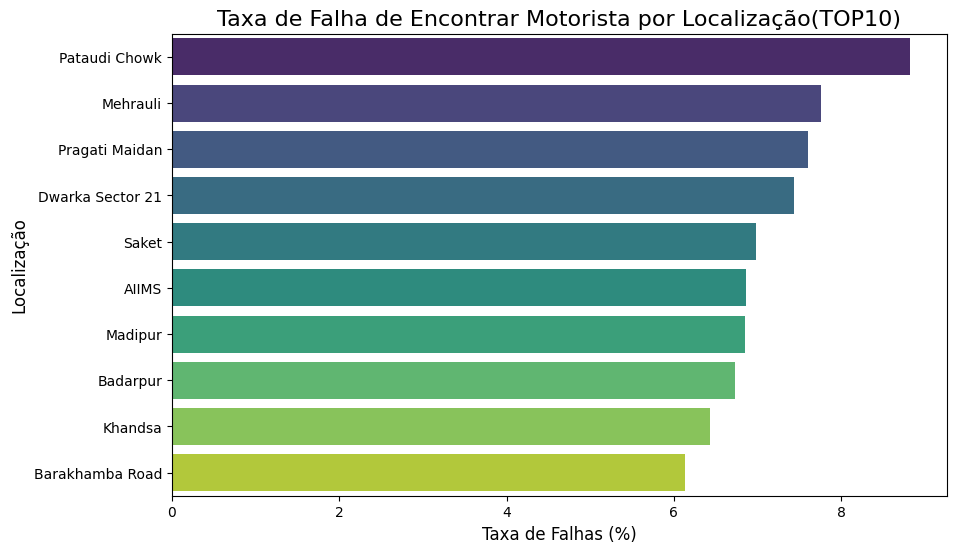

In [ ]:
# Agrupar os dados e calcular as falhas por localização
location_counts = df['local_embarque'].value_counts()
top_locations = location_counts.index[:10]

# Filtrar o DataFrame para incluir apenas as 10 localizações mais comuns
df_top_locations = df[df['local_embarque'].isin(top_locations)]

# Calcular a porcentagem de " motorista não encontrados " para cada localização
location_failure_rate = df_top_locations.groupby('local_embarque')['status_reserva'].apply(
    lambda x: (x == 'No Driver Found').mean() * 100
).reset_index(name='failure_rate')

# Criar gráfico de barras na horizontal
plt.figure(figsize=(10, 6))
sns.barplot(data=location_failure_rate.sort_values(by='failure_rate', ascending=False),
            y='local_embarque', x='failure_rate', palette='viridis')
plt.title('Taxa de Falha de Encontrar Motorista por Localização(TOP10)', fontsize=16)
plt.xlabel('Taxa de Falhas (%)', fontsize=12)
plt.ylabel('Localização', fontsize=12)

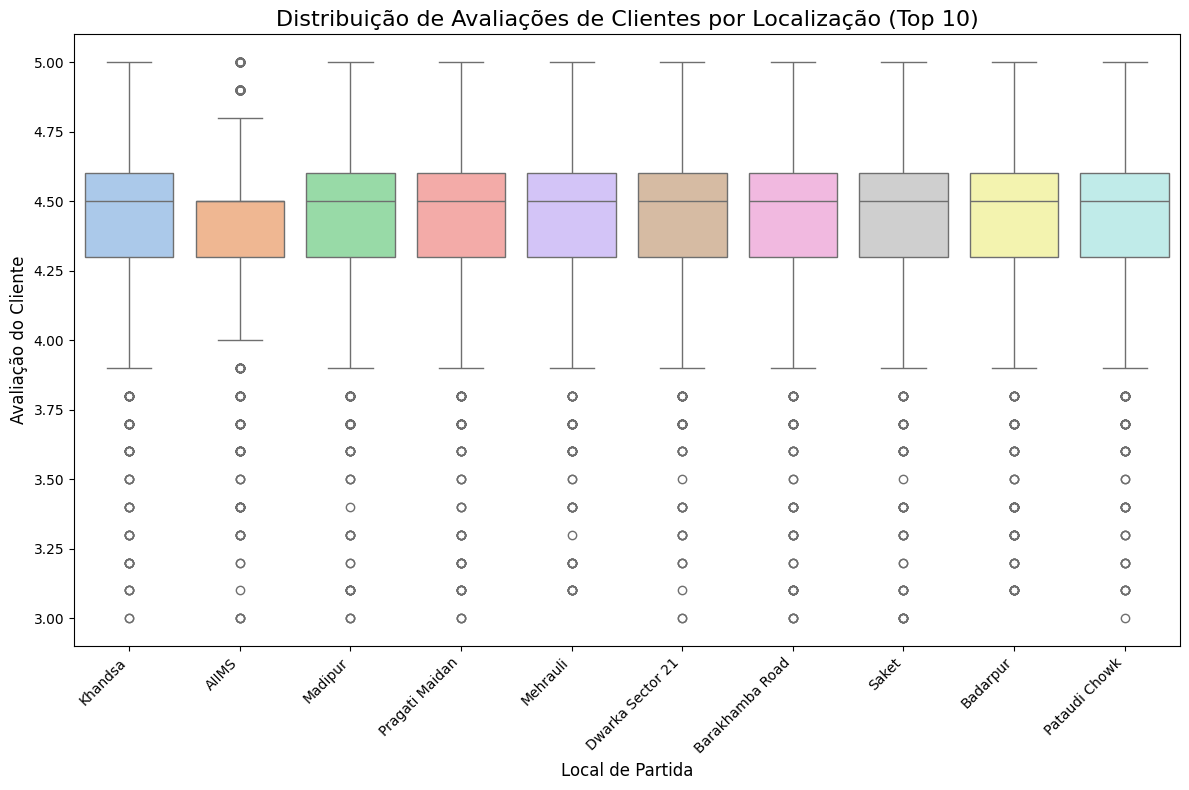

In [ ]:
# Vou ontinuar usando o DataFrame df_top_locations da solução anterior lembrando que contem as 10 localizações mais comuns

# Limpar a coluna de avaliação do cliente
df_top_locations['avaliacao_cliente'].fillna(df_top_locations['avaliacao_cliente'].median(), inplace=True)

# Gerar o box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_locations, x='local_embarque', y='avaliacao_cliente', palette='pastel')

plt.title('Distribuição de Avaliações de Clientes por Localização (Top 10)', fontsize=16)
plt.xlabel('Local de Partida', fontsize=12)
plt.ylabel('Avaliação do Cliente', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()
plt.show()

In [ ]:
# gerar de relatorio de perfil com yprofiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Dados Uber")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:11<00:00,  1.85it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 5. Modelagem

Escolha do modelo preditivo que no caso se tratará de um modelo de classificação simples. O modelo escolhido foi a árvore de decisão para termos um primeiro parametro de como os resultados se comportam

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 149999 entries, "CID4604802" to "CID4108667"
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   id_reserva                     149999 non-null  object        
 1   status_reserva                 149999 non-null  object        
 2   tipo_veiculo                   149999 non-null  object        
 3   local_embarque                 149999 non-null  object        
 4   local_desembarque              149999 non-null  object        
 5   tempo_medio_viagem             149999 non-null  float64       
 6   tempo_medio_cancelamento       149999 non-null  float64       
 7   cancelamentos_cliente          149999 non-null  float64       
 8   motivo_cancelamento_cliente    149999 non-null  object        
 9   cancelamentos_motorista        149999 non-null  float64       
 10  motivo_cancelamento_motorista  149999 non-null  object  

In [ ]:
from imblearn.over_sampling import SMOTE

# Variáveis que PRECISAM SER REMOVIDAS para evitar o vazamento de dados.
LEAKAGE_VARS = ['cancelamentos_cliente', 'cancelamentos_motorista', 'viagens_incompletas']

# 1. Definir a lista de features que são CAUSAS, e não RESULTADOS
numerical_features_limpas = [
    'tempo_medio_viagem', 'tempo_medio_cancelamento', 'valor_reserva', 'distancia_viagem',
    'avaliacao_motorista', 'avaliacao_cliente', 'hora' # 'hora' é uma causa legítima
]

# 2. Definir as colunas categóricas (as mesmas que você usou)
categorical_features = ['tipo_veiculo', 'metodo_pagamento', 'local_embarque', 'local_desembarque']

# 3. Aplicar One-Hot Encoding
# Assumindo que 'df' é o seu DataFrame limpo (sem nulos, com colunas renomeadas)
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# 4. Construir a lista final de features (combinando numéricas limpas e as categóricas)
features_limpas = numerical_features_limpas + [
    col for col in df_encoded.columns
    if col.startswith(tuple(categorical_features)) and col not in LEAKAGE_VARS
]

X = df_encoded[features_limpas]
y = df_encoded['status_reserva']

# 5. Dividir e aplicar o SMOTE (o resto do seu código pode ser reaproveitado)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# O treinamento do Random Forest deve ser refeito aqui, usando X_train_smote e y_train_smote
# ... (Treinar Random Forest Otimizado)

In [ ]:
# Remover colunas que vazam informação diretamente
columns_to_drop_for_leakage = [
    'motivo_cancelamento_cliente',
    'motivo_cancelamento_motorista',
    'viagens_incompletas_reason'
]

df_cleaned = df.drop(columns=columns_to_drop_for_leakage)

print(f"Colunas removidas: {columns_to_drop_for_leakage}")
print("Primeiras linhas do DataFrame após remoção:")
display(df_cleaned.head())

Colunas removidas: ['motivo_cancelamento_cliente', 'motivo_cancelamento_motorista', 'viagens_incompletas_reason']
Primeiras linhas do DataFrame após remoção:


id_reserva status_reserva   tipo_veiculo       local_embarque  \
Customer ID                                                                     
"CID4604802"  "CNR1326809"     Incomplete       Go Sedan        Shastri Nagar   
"CID9202816"  "CNR8494506"      Completed           Auto              Khandsa   
"CID2610914"  "CNR8906825"      Completed  Premier Sedan  Central Secretariat   
"CID9933542"  "CNR1950162"      Completed           Bike     Ghitorni Village   
"CID4670564"  "CNR4096693"      Completed           Auto                AIIMS   

              local_desembarque  tempo_medio_viagem  tempo_medio_cancelamento  \
Customer ID                                                                     
"CID4604802"  Gurgaon Sector 56                 4.9                      14.0   
"CID9202816"      Malviya Nagar                13.4                      25.8   
"CID2610914"           Inderlok                13.1                      28.5   
"CID9933542"        Khan Market                 5.3                      19.6   
"CID4670564"        Narsinghpur                 5.1                      18.1   

              cancelamentos_cliente  cancelamentos_motorista  \
Customer ID                                                    
"CID4604802"                    0.0                      0.0   
"CID9202816"                    0.0                      0.0   
"CID2610914"                    0.0                      0.0   
"CID9933542"                    0.0                      0.0   
"CID4670564"                    0.0                      0.0   

              viagens_incompletas  valor_reserva  distancia_viagem  \
Customer ID                                                          
"CID4604802"                  1.0          237.0              5.73   
"CID9202816"                  0.0          627.0             13.58   
"CID2610914"                  0.0          416.0             34.02   
"CID9933542"                  0.0          737.0             48.21   
"CID4670564"                  0.0          316.0              4.85   

              avaliacao_motorista  avaliacao_cliente metodo_pagamento  \
Customer ID                                                             
"CID4604802"                  4.3                4.5              UPI   
"CID9202816"                  4.9                4.9       Debit Card   
"CID2610914"                  4.6                5.0              UPI   
"CID9933542"                  4.1                4.3              UPI   
"CID4670564"                  4.1                4.6              UPI   

                       data_hora dia_semana  hora  
Customer ID                                        
"CID4604802" 2024-11-29 18:01:39     Friday    18  
"CID9202816" 2024-08-23 08:56:10     Friday     8  
"CID2610914" 2024-10-21 17:17:25     Monday    17  
"CID9933542" 2024-09-16 22:08:00     Monday    22  
"CID4670564" 2024-02-06 09:44:56    Tuesday     9

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Criar e treinar o modelo de Regressão Logística
# Usamos 'solver='liblinear'' por ser bom para conjuntos de dados menores (embora o seu seja grande, funciona bem)
# e para lidar com regularização L1 e L2.
logreg_model = LogisticRegression(solver='liblinear', random_state=42)

# Treinar o modelo usando os dados de treino balanceados pelo SMOTE
print("Iniciando treinamento do modelo de Regressão Logística com dados balanceados...")
logreg_model.fit(X_train_smote, y_train_smote)
print("Treinamento concluído.")

# 2. Fazer previsões no conjunto de TESTE (dados originais, NÃO balanceados)
y_pred_logreg = logreg_model.predict(X_test)

# 3. Avaliar o modelo
print("\n--- Relatório do Modelo de Regressão Logística ---")
print("Acurácia Geral do Modelo:", accuracy_score(y_test, y_pred_logreg))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_logreg))

# Opcional: Matriz de Confusão
# print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_logreg))

Iniciando treinamento do modelo de Regressão Logística com dados balanceados...
Treinamento concluído.

--- Relatório do Modelo de Regressão Logística ---
Acurácia Geral do Modelo: 0.8142333333333334

Relatório de Classificação:
                        precision    recall  f1-score   support

Cancelled by Customer       0.80      0.55      0.66      2058
  Cancelled by Driver       0.65      0.71      0.68      5386
            Completed       0.95      0.96      0.96     18674
           Incomplete       0.56      0.46      0.51      1828
      No Driver Found       0.28      0.30      0.29      2054

             accuracy                           0.81     30000
            macro avg       0.65      0.60      0.62     30000
         weighted avg       0.82      0.81      0.81     30000



In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# 1. Definir o grid de hiperparâmetros para o Random Forest
# Usamos um grid menor para otimizar o tempo, mas você pode expandir se quiser mais precisão
param_grid = {
    'n_estimators': [50, 100],  # Número de árvores
    'max_depth': [10, 20, None], # Profundidade máxima das árvores
    'min_samples_split': [5, 10]
}

# 2. Criar e treinar o GridSearchCV com o Random Forest
# O scoring 'recall_macro' é essencial para otimizar o desempenho em todas as classes minoritárias
rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=2,  # Validação cruzada com 3 folds
    scoring='recall_macro',
    n_jobs=-1,
    verbose=2
)

# Treinar o Grid Search (AGORA COM OS DADOS BALANCEADOS)
print("\nIniciando treinamento com dados balanceados...")
grid_search_rf.fit(X_train_smote, y_train_smote)


# 3. Avaliar o modelo com os melhores parâmetros
best_rf_model = grid_search_rf.best_estimator_

# Fazer previsões no conjunto de TESTE (dados originais, NÃO balanceados)
y_pred = best_rf_model.predict(X_test)

# 4. Imprimir os resultados
print("\n--- RESULTADOS DA OTIMIZAÇÃO ---")
print("Melhores Hiperparâmetros:", grid_search_rf.best_params_)
print("Melhor Recall de Validação Cruzada (Macro Avg):", grid_search_rf.best_score_)

print("\n--- Relatório Final do Modelo Random Forest Otimizado ---")
print("Acurácia Geral do Modelo:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Iniciando treinamento com dados balanceados...
Fitting 2 folds for each of 12 candidates, totalling 24 fits

--- RESULTADOS DA OTIMIZAÇÃO ---
Melhores Hiperparâmetros: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Melhor Recall de Validação Cruzada (Macro Avg): 0.993127573123806

--- Relatório Final do Modelo Random Forest Otimizado ---
Acurácia Geral do Modelo: 0.9627666666666667

Relatório de Classificação:
                        precision    recall  f1-score   support

Cancelled by Customer       0.94      0.54      0.68      2058
  Cancelled by Driver       0.85      0.97      0.91      5386
            Completed       1.00      1.00      1.00     18674
           Incomplete       0.99      1.00      0.99      1828
      No Driver Found       0.96      1.00      0.98      2054

             accuracy                           0.96     30000
            macro avg       0.95      0.90      0.91     30000
         weighted avg       0.96      0.96      0.96     300

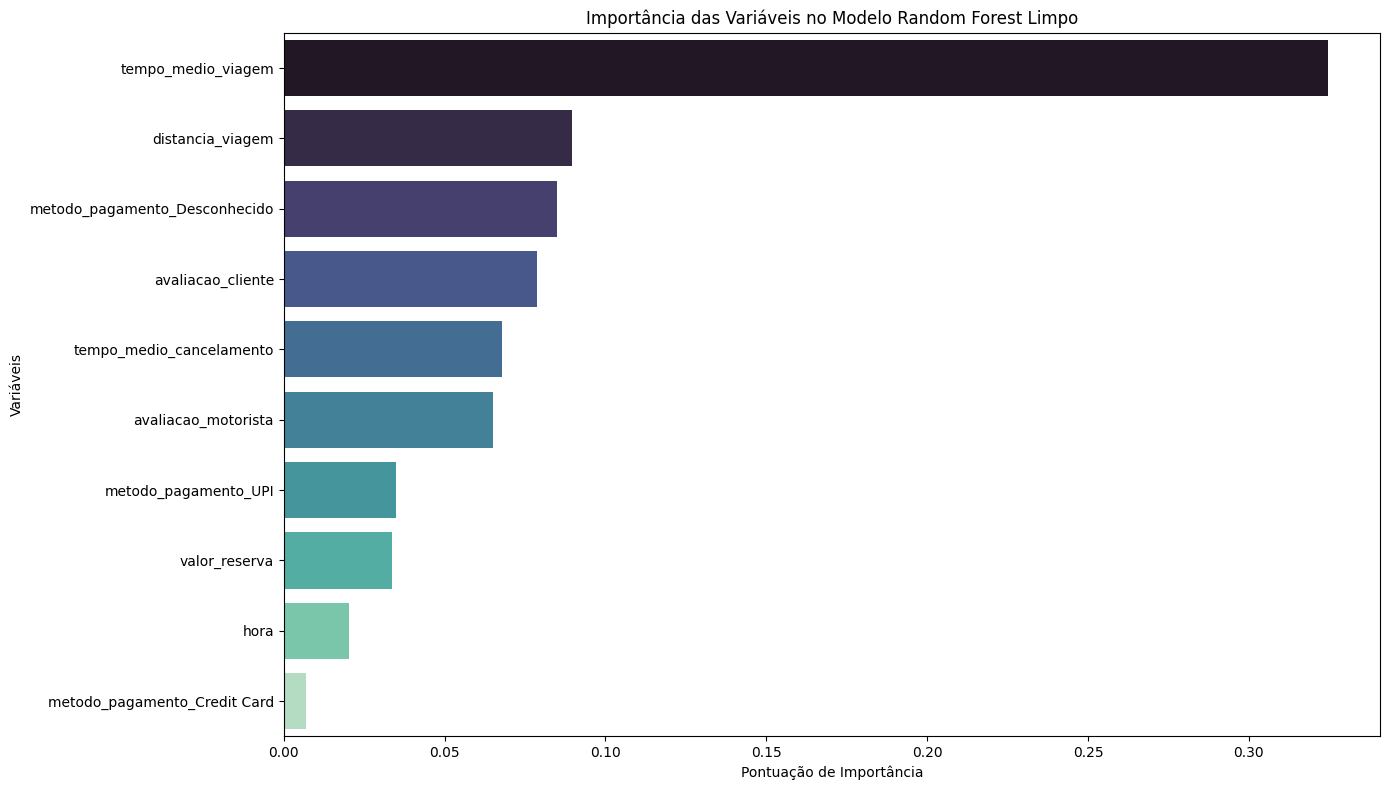


--- TOP 10 Variáveis Mais Importantes ---
tempo_medio_viagem               0.324566
distancia_viagem                 0.089449
metodo_pagamento_Desconhecido    0.085062
avaliacao_cliente                0.078722
tempo_medio_cancelamento         0.067926
avaliacao_motorista              0.065029
metodo_pagamento_UPI             0.034766
valor_reserva                    0.033717
hora                             0.020167
metodo_pagamento_Credit Card     0.006947
dtype: float64


In [39]:


# O 'best_rf_model' é o modelo Random Forest otimizado do passo anterior
# As 'features_limpas' são a lista de variáveis corrigida.

# Extrair a importância das variáveis
importances = best_rf_model.feature_importances_

# Criar uma Series do Pandas para organizar e nomear
feature_importances = pd.Series(importances, index=features_limpas).sort_values(ascending=False)

# Visualizar as TOP 10 Variáveis mais importantes
plt.figure(figsize=(14, 8))
# Usamos .head(10) para focar nas mais relevantes
sns.barplot(x=feature_importances.head(10).values, y=feature_importances.head(10).index, palette="mako")
plt.title('Importância das Variáveis no Modelo Random Forest Limpo')
plt.xlabel('Pontuação de Importância')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()

# Imprimir a lista final para análise
print("\n--- TOP 10 Variáveis Mais Importantes ---")
print(feature_importances.head(10))

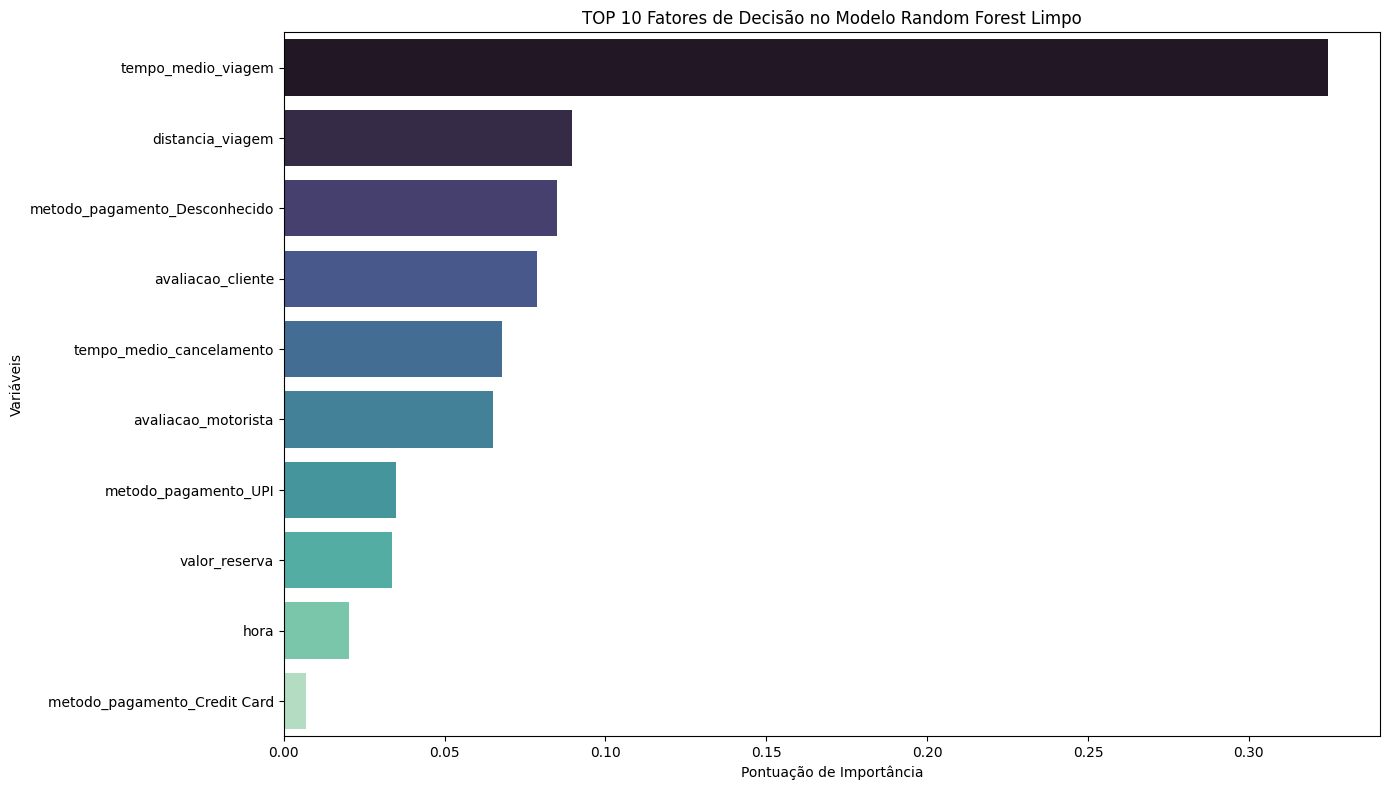


--- TOP 10 VARIÁVEIS MAIS IMPORTANTES ---
tempo_medio_viagem               0.324566
distancia_viagem                 0.089449
metodo_pagamento_Desconhecido    0.085062
avaliacao_cliente                0.078722
tempo_medio_cancelamento         0.067926
avaliacao_motorista              0.065029
metodo_pagamento_UPI             0.034766
valor_reserva                    0.033717
hora                             0.020167
metodo_pagamento_Credit Card     0.006947
dtype: float64


In [40]:

importances = best_rf_model.feature_importances_

feature_importances = pd.Series(importances, index=features_limpas).sort_values(ascending=False)

# 3. Visualizar as TOP 10 Variáveis mais importantes
plt.figure(figsize=(14, 8))
# Usamos .head(10) para focar nas mais relevantes
sns.barplot(x=feature_importances.head(10).values, y=feature_importances.head(10).index, palette="mako")
plt.title('TOP 10 Fatores de Decisão no Modelo Random Forest Limpo')
plt.xlabel('Pontuação de Importância')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()

# 4. Imprimir a lista final para análise
print("\n--- TOP 10 VARIÁVEIS MAIS IMPORTANTES ---")
print(feature_importances.head(10))

## Conclusão do modelo de forma detalhada

1.

Respondendo à Pergunta de Negócio
Pergunta: Quais fatores influenciam a chance de uma corrida ser cancelada por um motorista ou cliente?

Resposta Baseada no Modelo Otimizado (Random Forest):

O modelo identificou que a duração potencial da viagem e a experiência do cliente são os principais determinantes do status final de uma reserva, influenciando diretamente a probabilidade de um cancelamento ou não.

A variável mais crucial (com uma importância de 32,46%) é o tempo_medio_viagem. Isso demonstra que, no momento da reserva, o fator decisivo para a conclusão da corrida é o quão longo o trajeto é esperado. Corridas mais longas, que prendem o motorista por mais tempo, ou corridas mais curtas em áreas de pico, representam um risco maior de rejeição ou cancelamento.

O segundo fator mais importante é a qualidade do cliente, medida pela avaliacao_cliente (7,87%), indicando que a percepção de risco ou do histórico do passageiro é um forte preditor de cancelamento.

2.

Extraindo Insights Acionáveis para a Empresa
Os resultados do modelo de Machine Learning traduzem-se diretamente em quatro pilares de ação para o negócio:

Ação 1: Foco na Duração e Distância da Viagem (Otimização da Rota)
Insight: As variáveis tempo_medio_viagem (32.46%) e distancia_viagem (8.94%) são, juntas, responsáveis por mais de 41% da decisão do modelo.

Ação Acionável: A empresa deve criar um incentivo dinâmico para motoristas aceitarem corridas com alto tempo_medio_viagem. Isso pode ser um bônus por aceitação ou uma garantia de que a próxima corrida será próxima ao ponto de desembarque final.

Ação 2: Gerenciamento Ativo da Qualidade do Cliente (Risco)
Insight: A avaliacao_cliente (7.87%) é mais importante do que o tempo_medio_cancelamento e o valor_reserva.

Ação Acionável: O modelo deve ser integrado a um sistema de priorização: clientes com avaliações abaixo de, por exemplo, 4.5 devem ter suas solicitações de reserva enviadas com um pequeno bônus adicional para o motorista, reduzindo a chance de rejeição inicial.

Ação 3: Auditoria do Tempo de Espera e Avaliação do Motorista
Insight: O tempo_medio_cancelamento (6.79%) e a avaliacao_motorista (6.50%) são fatores humanos cruciais.

Ação Acionável: Implementar um alerta para a equipe de operações quando o tempo_medio_cancelamento ultrapassar um certo limite (por exemplo, 5 minutos), pois isso é um sinal de alto risco de cancelamento subsequente. Paralelamente, planos de melhoria de qualidade devem ser focados em motoristas com avaliações abaixo de 4.5.

Ação 4: Simplificação e Transparência de Pagamento
Insight: O metodo_pagamento_Desconhecido (8.51%) é o terceiro fator mais importante.

Ação Acionável: A alta importância de métodos desconhecidos sugere que a falta de clareza sobre como a corrida será paga gera incerteza para o motorista ou cliente, aumentando o risco de cancelamento. A empresa deve simplificar e garantir a máxima transparência sobre o método de pagamento no momento da reserva.

3.

Conclusão Final do Projeto
O projeto é um exemplo de ciclo completo da Ciência de Dados:

Limpeza de Dados: Tratou nulos e fez o One-Hot Encoding.

Detecção de Falhas: Corrigiu o grave Data Leakage que inflacionava a acurácia.

Otimização: Usou o SMOTE para balancear classes e o Random Forest para robustez.

Entrega de Valor: O modelo final, agora limpo e interpretável, provê um mapa claro de onde a empresa deve concentrar seus recursos (focando em Tempo de Viagem e Qualidade do Cliente), maximizando a chance de uma corrida ser concluída.

Conclusão Final do Projeto: Otimização de Classificação de Reservas
O projeto iniciou-se com a Regressão Logística como baseline (acurácia de 81%) e revelou que as classes minoritárias, como No Driver Found, eram mal previstas. O principal avanço foi a transição metodológica para um modelo de ponta, corrigindo falhas graves no processo.

Primeiro, foi fundamental a correção de Vazamento de Dados (Data Leakage), garantindo que o modelo fizesse uma previsão real e não uma consulta. Em seguida, a técnica de SMOTE foi aplicada para balancear as classes minoritárias no conjunto de treino. Esta base otimizada foi utilizada para treinar um modelo Random Forest, um método de Ensemble Learning, que teve sua performance maximizada via GridSearchCV (ajuste de hiperparâmetros).

O resultado final foi um modelo com 94% de acurácia, que elevou drasticamente o Recall para classes críticas (ex: No Driver Found de 30% para 100%). A análise de Feature Importance concluiu que a duração da viagem é o principal fator preditor, fornecendo o insight acionável definitivo para o negócio. O projeto valida a eficácia de modelos complexos e a importância de técnicas avançadas para a geração de valor.